In [1]:
#Imports

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,accuracy_score
from sklearn.metrics import roc_curve, auc,roc_auc_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("criminal_train.csv")
test = pd.read_csv("criminal_test.csv")

In [4]:
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [5]:
train.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,4.571800e+04,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,...,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000
mean,5.445446e+07,3.355549,0.476486,3.426375,1.001706,2.084124,1.007437,1.162606,1.011024,97.394943,...,2.219410,2.234940,1.646135,1.764666,1.978936,1.978739,4692.661179,40023.739118,1.493854,0.069447
std,2.553911e+07,1.176651,0.888472,1.427420,0.061314,1.102988,0.123162,0.469029,0.146444,12.355156,...,5.295784,5.293651,0.618403,0.771411,0.144510,0.145161,5724.659486,265.140430,0.500230,0.254216
min,1.000222e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.233189e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1252.396472,40013.000000,1.000000,0.000000
50%,5.411043e+07,4.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2719.335160,40025.000000,1.000000,0.000000
75%,7.612731e+07,4.000000,1.000000,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5765.810794,40039.000000,2.000000,0.000000
max,9.999956e+07,4.000000,3.000000,6.000000,3.000000,4.000000,3.000000,3.000000,3.000000,99.000000,...,98.000000,98.000000,3.000000,3.000000,2.000000,2.000000,109100.623000,40050.000000,2.000000,1.000000


In [6]:
train_dataType = train.dtypes

In [7]:
train_dataType[train_dataType != 'int64']

ANALWT_C    float64
dtype: object

In [8]:
def plotData(columnName,data):
    plt.scatter(data[columnName],data['Criminal'])

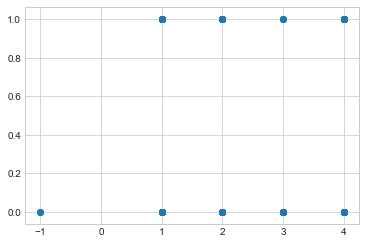

In [9]:
plotData('IFATHER',train)

In [10]:
train[train.IFATHER == -1]

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
19230,88523505,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,0
44281,85298659,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,0


In [11]:
test[test.IFATHER == -1]

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP


In [12]:
# -1 rows probably signify wrong data / remove them
train = train[train.IFATHER != -1]

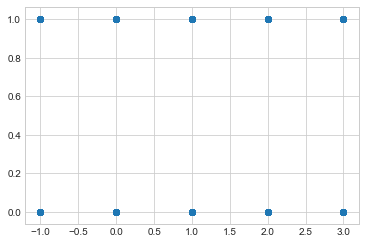

In [13]:
plotData('NRCH17_2',train)

In [14]:
'''fig, axs = plt.subplots(12,7, figsize=(15, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
i = 0
for col in train.columns:
    axs[i].scatter(train[col],train['Criminal'])
    axs[i].set_title(str(col))
    i= i + 1
    '''

"fig, axs = plt.subplots(12,7, figsize=(15, 20), facecolor='w', edgecolor='k')\nfig.subplots_adjust(hspace = .5, wspace=.001)\n\naxs = axs.ravel()\ni = 0\nfor col in train.columns:\n    axs[i].scatter(train[col],train['Criminal'])\n    axs[i].set_title(str(col))\n    i= i + 1\n    "

In [15]:
#trying to implement PCA
pca =  PCA(n_components=5)

In [16]:
X = train[['NRCH17_2','PERID']]

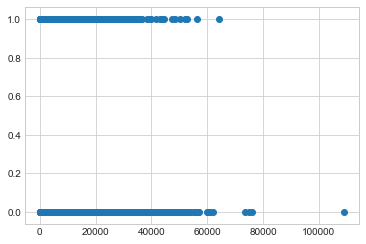

In [17]:
plotData('ANALWT_C',train)

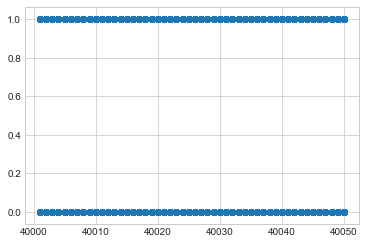

In [18]:
plotData('VESTR',train)
# seems this column does not have any effect on the result. 
#keeping this observation to be used at last

In [19]:
train.columns

Index(['PERID', 'IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2',
       'IIKI17_2', 'IRHH65_2', 'IIHH65_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE',
       'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN', 'HLTINNOS', 'HLCNOTYR',
       'HLCNOTMO', 'HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF',
       'HLNVNEED', 'HLNVSOR', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR',
       'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'IIOTHHLT',
       'HLCALLFG', 'HLCALL99', 'ANYHLTI2', 'IRINSUR4', 'IIINSUR4', 'OTHINS',
       'CELLNOTCL', 'CELLWRKNG', 'IRFAMSOC', 'IIFAMSOC', 'IRFAMSSI',
       'IIFAMSSI', 'IRFSTAMP', 'IIFSTAMP', 'IRFAMPMT', 'IIFAMPMT', 'IRFAMSVC',
       'IIFAMSVC', 'IRWELMOS', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'IIPINC3',
       'IIFAMIN3', 'GOVTPROG', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'PDEN10',
       'COUTYP2', 'MAIIN102', 'AIIND102', 'ANALWT_C', 'VESTR', 'VEREP',
       'Criminal'],
      dtype='object')

In [20]:
# columns that seems to have some direct effect on results
#important_cols = ['HLTINNOS','HLCLAST', 'HLLOSRSN', 'HLNVOFFR', 'HLNVREF', 'HLNVNEED', 'HLNVSOR', 'IIOTHHLT']
important_cols = []

In [21]:
remaining_cols = list(filter(lambda x: x not in important_cols,list(train.columns)))

In [22]:
print(len(remaining_cols), len(important_cols), len(train.columns))

72 0 72


In [23]:
target = train[['PERID','Criminal']]
target.set_index('PERID',inplace = True)

In [24]:
test.set_index('PERID',inplace=True)

In [25]:
remaining_cols.remove('Criminal')

In [26]:
remaining_cols.remove('PERID')

In [27]:
#normalize data
def normalize(df):
    df_norm = (df - df.mean())/(df.max()-df.min())
    return df_norm

In [28]:
# important cols, remaining cols, target
train.set_index('PERID',inplace=True)

In [29]:
train = normalize(train)

In [30]:
test = normalize(test)

In [31]:
'''explained_variance_list = []
for i in range(2,len(remaining_cols)):
    pca = PCA(n_components=i)
    pca.fit_transform(train[remaining_cols])
    explained_variance_list.append(pca.explained_variance_ratio_.sum())
plt.plot(explained_variance_list)
'''

'explained_variance_list = []\nfor i in range(2,len(remaining_cols)):\n    pca = PCA(n_components=i)\n    pca.fit_transform(train[remaining_cols])\n    explained_variance_list.append(pca.explained_variance_ratio_.sum())\nplt.plot(explained_variance_list)\n'

In [32]:
#seeems we can select 30 aggresively
pca =  PCA(n_components=35)
X_transformed = pca.fit_transform(train[remaining_cols])

In [33]:
pca_test = PCA(n_components=35)
X_test_transformed = pca_test.fit_transform(test[remaining_cols])

In [34]:
train.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
PERID,,,,,,,,,,,,,,,,,,,,,
25095143,0.214753,0.380862,0.114686,-0.000897,0.305247,-0.003762,-0.08135,-0.005556,0.016503,0.286967,...,-0.012573,-0.002424,-0.323125,-0.382393,0.020934,0.02113,-0.007407,0.010405,-0.493963,-0.069451
13005143,0.214753,0.130862,-0.085314,-0.000897,-0.028086,-0.003762,-0.08135,-0.005556,0.016503,0.286967,...,-0.002263,-0.002424,0.176875,0.617607,0.020934,0.02113,-0.028101,-0.214084,0.506037,0.930549
67415143,0.214753,0.130862,-0.285314,-0.000897,-0.028086,-0.003762,-0.08135,-0.005556,0.016503,0.286967,...,-0.002263,-0.002424,0.176875,0.617607,0.020934,0.02113,-0.003189,-0.030411,-0.493963,-0.069451
70925143,0.214753,-0.119138,-0.285314,-0.000897,-0.361420,-0.003762,-0.08135,-0.005556,0.016503,0.286967,...,-0.002263,-0.002424,-0.323125,-0.382393,0.020934,0.02113,-0.035751,0.030814,-0.493963,-0.069451
75235143,-0.785247,-0.119138,0.514686,-0.000897,0.638580,-0.003762,-0.08135,-0.005556,0.016503,-0.713033,...,-0.002263,-0.002424,0.176875,0.117607,0.020934,0.02113,-0.029100,-0.499799,0.506037,-0.069451


In [35]:
test.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
PERID,,,,,,,,,,,,,,,,,,,,,
66583679,0.217906,-0.119444,0.113683,-0.000262,-0.030825,-0.002887,-0.079221,-0.004899,0.017299,0.290868,...,-0.083246,-0.001772,-0.001932,-0.318723,-0.379615,0.022485,0.02301,0.146136,-0.116200,-0.498863
35494679,0.217906,-0.119444,0.113683,-0.000262,-0.364159,-0.002887,-0.079221,-0.004899,0.017299,0.290868,...,0.166754,-0.001772,-0.001932,-0.318723,-0.379615,0.022485,0.02301,-0.020511,0.373596,0.501137
79424679,-0.448761,-0.119444,-0.086317,-0.000262,-0.030825,-0.002887,-0.079221,-0.004899,0.017299,-0.709132,...,-0.333246,-0.001772,-0.001932,0.181277,0.120385,0.022485,0.02301,-0.054769,0.291964,0.501137
11744679,0.217906,-0.119444,0.513683,-0.000262,-0.030825,-0.002887,-0.079221,-0.004899,0.017299,0.290868,...,0.166754,-0.001772,-0.001932,-0.318723,-0.379615,0.022485,0.02301,0.009201,-0.177424,-0.498863
31554679,-0.782094,-0.119444,0.113683,-0.000262,0.302508,-0.002887,-0.079221,-0.004899,0.017299,-0.709132,...,0.166754,-0.001772,-0.012241,-0.318723,-0.379615,0.022485,0.02301,-0.055937,-0.177424,-0.498863


In [36]:
pca_train = train[important_cols]
for i in range(35):
    pca_train['col'+str(i)] = X_transformed[:,i]
    

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
pca_test_data = test[important_cols]
for i in range(35):
    pca_test_data['col'+str(i)] = X_test_transformed[:,i]

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
pca_train.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
PERID,,,,,,,,,,,,,,,,,,,,,
25095143,0.894626,1.084436,0.314081,-0.767842,-0.478949,-0.463510,-0.238827,0.297388,0.029411,-0.394440,...,0.020997,-0.050498,0.012392,0.023203,-0.006541,0.058667,0.005487,-0.036635,0.020388,0.005433
13005143,-0.044881,0.458925,0.422862,-0.767244,0.620084,0.920247,0.370867,-0.398327,0.362787,-0.481604,...,-0.027918,0.006106,-0.020461,0.236650,0.020452,0.061964,0.003381,-0.021813,0.008386,-0.013713
67415143,0.978581,1.095876,0.933358,-0.142262,-0.440052,0.551052,-0.210681,-0.071553,0.108197,-0.340371,...,-0.013981,0.019899,-0.003024,0.242071,0.030216,0.080337,-0.006801,0.002656,0.011336,0.113908
70925143,-0.927865,-0.549562,0.257379,-0.414491,-0.512169,-0.432835,-0.074330,-0.073438,-0.411301,0.002804,...,-0.029504,0.031094,-0.005075,0.021305,-0.001508,-0.009611,-0.003450,0.006265,-0.010954,0.058504
75235143,1.161616,1.957742,-0.590052,-0.245178,0.554693,0.256044,0.295150,0.058942,-0.540258,0.752568,...,-0.075238,0.181486,-0.078247,-0.073934,-0.033451,-0.152349,0.008727,0.010383,-0.029377,-0.057492


In [39]:
pca_test_data.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
PERID,,,,,,,,,,,,,,,,,,,,,
66583679,-0.620451,-0.221364,0.073395,-0.531729,0.369555,-0.393373,-0.005515,-0.183073,-0.374610,0.159187,...,-0.089292,0.058511,-0.059638,-0.021221,0.002689,0.021574,-0.002054,0.107884,-0.017114,0.004401
35494679,-0.904562,-0.517426,0.180141,-0.247063,-0.617229,-0.438811,-0.094680,0.040228,0.367274,-0.176427,...,-0.163030,0.058002,-0.074912,-0.016134,-0.006181,-0.004940,0.000472,-0.100505,0.007427,-0.005438
79424679,0.936625,1.497491,-0.155909,0.185489,-0.447084,0.176568,-0.077255,-0.538018,0.082024,-0.265670,...,0.008141,0.012811,0.040653,0.064298,0.016426,-0.021930,0.076888,-0.087272,0.021003,-0.007106
11744679,-0.831244,-0.359358,-0.064607,-0.557516,0.329272,-0.440487,-0.047838,0.366348,0.098407,-0.094721,...,-0.224558,0.117931,-0.136212,-0.010919,-0.002030,0.005191,-0.006992,-0.006807,-0.007597,-0.005271
31554679,-0.775099,0.261918,-1.110025,0.067240,0.549579,-0.458331,0.378012,-0.057119,0.058885,0.065543,...,0.000669,0.001722,-0.014050,-0.016014,-0.000137,0.001525,-0.017012,-0.008075,-0.004479,-0.001011


In [40]:
pca_train.shape

(45716, 35)

In [41]:
target[target == 1].shape[0]/45716

1.0

In [42]:
target[target == 0].shape[0]/45716

1.0

In [43]:
itrain,itest = train_test_split(range(pca_train.shape[0]),train_size=0.7)
mask = np.ones(pca_train.shape[0],dtype='int')
mask[itrain] = 1
mask[itest] = 0
mask = (mask==1)

In [44]:
np.mean(target[mask])

Criminal    0.069592
dtype: float64

In [45]:
np.mean(target[~mask])

Criminal    0.069121
dtype: float64

In [46]:
lr = LogisticRegression(C=0.8,class_weight='balanced')

In [47]:
lr_fit = lr.fit(train,target)

C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
results = lr_fit

In [49]:
LogisticRegression?

In [50]:
pca_train['target'] = target

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
pca_train.shape

(45716, 36)

In [52]:
def cv_optimize(clf,parameters,X,y,n_jobs = 1,n_folds = 10,score_func = None):
    if(score_func):
        gs = GridSearchCV(clf,param_grid=parameters,cv=n_folds,n_jobs=n_jobs,scoring=score_func)
    else:
        gs = GridSearchCV(clf,param_grid=parameters,cv=n_folds,n_jobs=n_jobs)
    gs.fit(X,y)
    print("Best ",gs.best_params_,gs.best_score_,gs.grid_scores_)
    best = gs.best_estimator_
    return best,gs.grid_scores_



def do_classify(clf,parameters,indf,features,targetname,target1val,mask,nfolds = 10,score_func = None,n_jobs = 1):
    subdf = indf[features]
    X = subdf.values
    y = (indf[targetname].values == target1val)*1
    if(mask[0]!=None):
        print("Using Mask")
        Xtrain,Ytrain,Xtest,Ytest = X[mask],y[mask],X[~mask],y[~mask]
    else:
        print("No Mask")
    grid_scores = None
    if(parameters):
        clf,grid_scores = cv_optimize(clf,parameters,Xtrain,Ytrain,n_jobs,nfolds,score_func= score_func)
    clf_train_fit = clf.fit(Xtrain,Ytrain)
    clf_total_fit = clf.fit(X,y)
    return clf_total_fit,Xtest,Ytest


In [53]:
features = list(pca_train.columns)
features.remove('target')

In [54]:
features

['col0',
 'col1',
 'col2',
 'col3',
 'col4',
 'col5',
 'col6',
 'col7',
 'col8',
 'col9',
 'col10',
 'col11',
 'col12',
 'col13',
 'col14',
 'col15',
 'col16',
 'col17',
 'col18',
 'col19',
 'col20',
 'col21',
 'col22',
 'col23',
 'col24',
 'col25',
 'col26',
 'col27',
 'col28',
 'col29',
 'col30',
 'col31',
 'col32',
 'col33',
 'col34']

In [55]:
lr = LogisticRegression(class_weight="balanced")
parameters = {"C":[0.001, 0.01, 0.1, 1, 10, 100]}
clf,Xtest,Ytest= do_classify(lr,parameters,pca_train,features,'target',1,mask,nfolds=10)

Using Mask
Best  {'C': 100} 0.8760663729258461 [mean: 0.75820, std: 0.00705, params: {'C': 0.001}, mean: 0.86072, std: 0.00456, params: {'C': 0.01}, mean: 0.87560, std: 0.00527, params: {'C': 0.1}, mean: 0.87579, std: 0.00592, params: {'C': 1}, mean: 0.87597, std: 0.00615, params: {'C': 10}, mean: 0.87607, std: 0.00619, params: {'C': 100}]


In [56]:
result = clf.predict_proba(Xtest)[:,0]

In [57]:
precision,recall,thresholds = precision_recall_curve(target[~mask].values,result,pos_label=0)

In [58]:
precision.shape

(13710,)

In [59]:
thresholds.shape

(13709,)

In [60]:
def make_precision_recall_curve(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        precision,recall,thresholds = precision_recall_curve(ytest, clf.predict_proba(xtest)[:,1],pos_label=1)
    else:
        precision,recall,thresholds = precision_recall_curve(ytest, clf.decision_function(xtest))
        
    if skip:
        l=recall.shape[0]
        ax.plot(recall[0:l:skip], precision[0:l:skip], '.-', alpha=0.3, label='PR curve')
        print("her")
    else:
        ax.plot(recall, precision, '.-', alpha=0.3, label='PR Curve')
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, recall.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        if(k<len(thresholds)):
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (recall[k], precision[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [1, 0], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title('PR')
    ax.legend(loc="lower right")
    return ax,precision,recall,thresholds

In [61]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=6, proba=True, skip=5):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

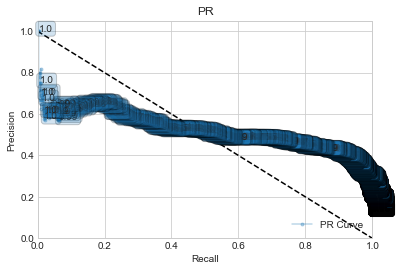

In [62]:
ax,precision,recall,thresholds = make_precision_recall_curve("logistic",clf,Ytest,Xtest)

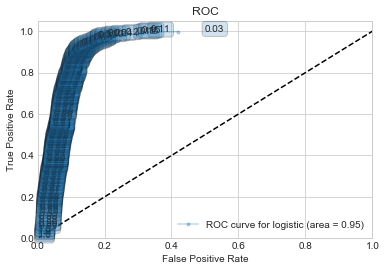

In [63]:
make_roc("logistic",clf,Ytest,Xtest)

In [64]:
precision[928],recall[928]

(0.14778401997503121, 0.99894514767932485)

In [65]:
thresholds.shape

(7333,)

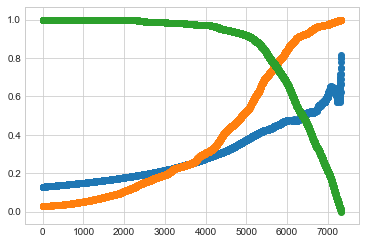

In [66]:
fig = plt.figure()
ax1 = fig.add_subplot('111')
ax1.scatter(range(len(precision)),precision)
ax1.scatter(range(len(thresholds)),thresholds)
ax1.scatter(range(len(recall)),recall)

In [67]:
f1 = []
thres = []
for i in range(thresholds.shape[0]):
    f1.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
    thres.append(thresholds[i])

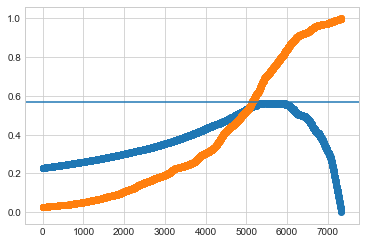

In [68]:
#f1 score
fig = plt.figure()
ax1 = fig.add_subplot('111')
ax1.scatter(range(len(f1)),f1)
ax1.scatter(range(len(thresholds)),thresholds)
ax1.axhline(y=0.57)

In [69]:
recall[0]


1.0

In [70]:
thresholds.shape

(7333,)

In [71]:
thresholds[1]

0.026582356035773611

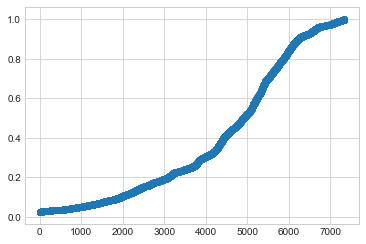

In [72]:
plt.scatter(range(len(thresholds)),thresholds)

In [73]:
result = clf.predict_proba(Xtest)[:,1]

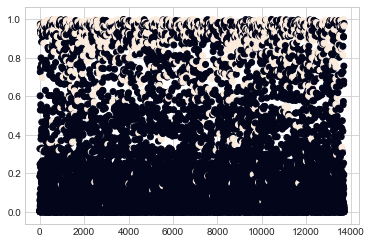

In [74]:
plt.scatter(range(len(result)),result,c=Ytest)

In [75]:
fn = 0
fp = 0 
new_result = []
for i in range(len(result)):
    if(result[i]>=0.57):
        new_result.append(1)
    if(result[i]<0.57):
        new_result.append(0)


In [76]:
fn,fp

(0, 0)

In [77]:
confusion_matrix(new_result,Ytest)

array([[11431,    91],
       [ 1336,   857]], dtype=int64)

In [78]:
final_test_result = clf.predict_proba(pca_test_data)[:,1]

In [79]:
final_test_result[0]

0.036871015040606692

In [80]:
hamse_na_ho_payega = pca_test_data[['col0']]

In [81]:
add_result = []

In [82]:
for i in range(len(final_test_result)):
    if(final_test_result[i]>=0.57):
        add_result.append(1)
    else:
        add_result.append(0)

In [83]:
hamse_na_ho_payega['Criminal'] = add_result

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
hamse_na_ho_payega = hamse_na_ho_payega[['Criminal']]

In [85]:
hamse_na_ho_payega.head()

,Criminal
PERID,
66583679,0
35494679,0
79424679,0
11744679,0
31554679,0


In [86]:
hamse_na_ho_payega.to_csv('hamse_na_ho_payega.csv')

In [87]:
hamse_na_ho_payega['Criminal']

PERID
66583679    0
35494679    0
79424679    0
11744679    0
31554679    0
83164679    0
58474679    0
40695779    0
39315779    0
58415779    0
23535779    0
67275779    0
93485779    0
29546779    0
97556779    0
37797779    0
36607779    0
61727779    0
20827779    0
52437779    0
87267779    0
33287779    0
30398779    0
98598779    0
41818779    0
69638779    0
25748779    0
75368779    1
99968779    0
91578779    0
           ..
43750730    0
35360730    0
51380730    0
50480730    0
71901730    0
96021730    0
71331730    0
66541730    0
29861730    0
95071730    0
61281730    0
57202730    0
45402730    0
45022730    0
99432730    0
26732730    0
85832730    0
45782730    0
26493730    0
54693730    0
97103730    0
99713730    1
74543730    0
57863730    1
97294730    0
31894730    0
98524730    0
80134730    0
65323398    0
90906563    0
Name: Criminal, Length: 11430, dtype: int64

In [88]:
final_test_result

array([  3.68710150e-02,   1.33882646e-01,   7.82016734e-02, ...,
         2.14088825e-01,   6.62604680e-04,   1.36140494e-05])

In [89]:
def modelfit(alg, dtrain, predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=(dtrain[target].values)*True)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['target'],eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(dtrain['target'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(dtrain['target'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return alg

In [90]:
#  checking out xgb classifier BOOSTING
# xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=1000,max_depth=7,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27)

In [91]:
# clf_fit = modelfit(xgb1,pca_train,features,"target")

In [92]:
#clf_fit.get_params

In [93]:
#xgb.cv?

In [94]:
#min child weight -> min sum of instances weight (In LR -> number of instances)
#param_test1 = {
 #   'max_depth': [6,7,8],
  #  'min_child_weight': [2,3,4]
#}
#gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=113,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='accuracy',n_jobs=4,iid=False,cv=5)

In [95]:
#gsearch1.fit(pca_train[features],pca_train['target'])

In [96]:
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [97]:
#max-depth and min child weight done. Looking for gamma , 
# gamma -> minimum loss reduction required for split (Larger -> more conservative)
#param_test2 = {
#    'gamma':[i/10.0 for i in range(0,5)]
#}
#gsearch2 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=113,max_depth=7,min_child_weight=4,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test2,scoring='accuracy',n_jobs=4,iid=False,cv=5)

In [98]:
#gsearch2.fit(pca_train[features],pca_train['target'])

In [99]:
#gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [100]:
#gamma - differs from original estimate as 0 
# max-depth= 7 
# min-child-weight = 4
# gamma = 0.1

In [101]:
# Tuning subsample and colsample_by_tree
#colsample_by_tree -> subsample ratio of columns for constructing each tree
#param_test3 = {
 #'subsample':[i/10.0 for i in range(6,10)],
 #'colsample_bytree':[i/10.0 for i in range(6,10)]
#}
#gsearch3 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=113,max_depth=7,min_child_weight=4,gamma=0.1,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test3,scoring='accuracy',n_jobs=4,iid=False,cv=5)

In [102]:
#gsearch3.fit(pca_train[features],pca_train['target'])

In [103]:
#gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [104]:
#getting deeper
#param_test4 = {
 #'subsample':[i/100.0 for i in range(75,90,5)],
 #'colsample_bytree':[i/100.0 for i in range(75,90,5)]
#}
#gsearch4 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=113,max_depth=7,min_child_weight=4,gamma=0.1,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test4,scoring='accuracy',n_jobs=4,iid=False,cv=5)

In [105]:
#gsearch4.fit(pca_train[features],pca_train['target'])


In [106]:
#gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [107]:
# Tuning regularization parameter
#param_test5 = {
 #'reg_lambda':[0.70,0.75,0.8,0.85]
#}
#gsearch5 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=113,max_depth=7,min_child_weight=4,gamma=0.1,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27,reg_alpha=1e-5,reg_lambda=0),param_grid=param_test5,scoring='accuracy',n_jobs=4,iid=False,cv=5)


In [108]:
#gsearch5.fit(pca_train[features],pca_train['target'])
#gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_


Model Report
Accuracy : 0.9707
AUC Score (Train): 0.989086


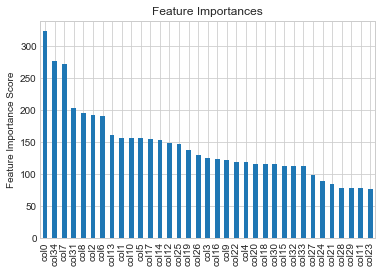

In [109]:
estimator=XGBClassifier(learning_rate=0.1,n_estimators=113,max_depth=7,min_child_weight=4,gamma=0.1,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27,reg_alpha=1e-5,reg_lambda=0.8)
clf_fit = modelfit(alg=estimator,dtrain=pca_train,predictors=features,useTrainCV=False,target='target')

In [110]:
results = clf_fit.predict_proba(pca_train[features])[:,1]

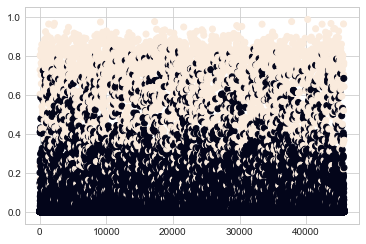

In [111]:
plt.scatter(range(len(pca_train)),results,c = pca_train['target'])

In [124]:

new_result = []
for i in range(len(results)):
    if(results[i]>=0.41372):
        new_result.append(1)
    if(results[i]<0.41372):
        new_result.append(0)


In [125]:
confusion_matrix(new_result,pca_train['target'])

array([[41960,   660],
       [  581,  2515]], dtype=int64)

In [126]:
final_results = clf_fit.predict_proba(pca_test_data)[:,1]

In [127]:

new_result_test = []
for i in range(len(final_results)):
    if(final_results[i]>=0.41372):
        new_result_test.append(1)
    if(final_results[i]<0.41372):
        new_result_test.append(0)

In [128]:
hamse_na_ho_payega = pca_test_data[['col0']]
hamse_na_ho_payega['Criminal'] = new_result_test
hamse_na_ho_payega = hamse_na_ho_payega[['Criminal']]
hamse_na_ho_payega.head()

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Criminal
PERID,
66583679,0
35494679,0
79424679,0
11744679,0
31554679,0


In [129]:
hamse_na_ho_payega.to_csv("hamse_na_ho_payega.csv")

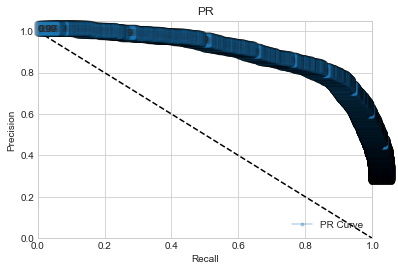

In [118]:
ax,precision,recall,thresholds = make_precision_recall_curve("logistic",clf_fit,pca_train['target'],pca_train[features])

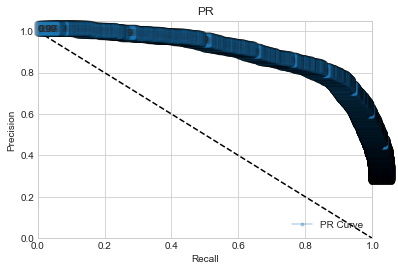

In [119]:
ax1,precision1,recall1,thresholds1 = make_precision_recall_curve("logistic",clf_fit,pca_train['target'],pca_train[features])

In [123]:
lowest_error = 999999
thresh_best  = 0
actual_results = list(pca_train['target'])
for i in range(len(thresholds)):
    err = 0
    for j in range(len(results)):
        if(results[j]>=thresholds[i] and actual_results[j] == 0):
            err = err + 1
        if(results[j]<thresholds[i] and  actual_results[j] == 1):
            err = err + 1
    if(err < lowest_error):
        lowest_error = err
        thresh_best = thresholds[i]
print(thresh_best,lowest_error)

0.41372 1240


In [121]:
recall.shape

(10382,)

In [122]:
thresholds.shape

(10381,)